In [1]:
vcf_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/somatic_variants/regions_atac_peaks/gatk_mutect/variants.vcf"

qual = 25
min_aaf = 0.05
max_aaf = 0.45
min_ad = 10
min_dp = 500

n_donors = 2

In [2]:
mid_het = 0.5/n_donors
mid_het

0.25

In [3]:
import sys
import cyvcf2
n = 0
from src.utils.data_io import read_csv_multichar

fig_utils from mplh


In [4]:
vars_to_keep = []
aaf_rm = []
aad_rm = []
depth_rm = []
qual_rm = []
snp_rm = []
all_aaf = []


af_all = []
ad_all = []
depth_all = []

af_kp = []
ad_kp = []
depth_kp = []
mid_rm = []

for v in cyvcf2.VCF(vcf_f):
    depth = sum(v.gt_depths)
    ad = sum(v.gt_alt_depths)
    af = ad/depth
    
    af_all.append(af)
    ad_all.append(ad)
    depth_all.append(depth)
    all_aaf.append(v.aaf)
    if v.var_type != 'snp': 
        snp_rm.append(v)
        continue # SNPs
    if v.QUAL is not None:
        if v.QUAL < qual: 
            qual_rm.append(v)
            continue
    if not (af > min_aaf and af < max_aaf): 
        aaf_rm.append(v)
        continue
    if not (ad > min_ad):
        aad_rm.append(v)
        continue
    if not (depth>min_dp):
        depth_rm.append(v)
        continue
    
    if not (af < mid_het-0.02 or af > mid_het+0.02):
        mid_rm.append(v)
        continue    
    
    
    vars_to_keep.append(v)
    af_kp.append(af)
    ad_kp.append(ad)
    depth_kp.append(depth)
    n += 1
    if n%1000 == 0:
        print(n)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

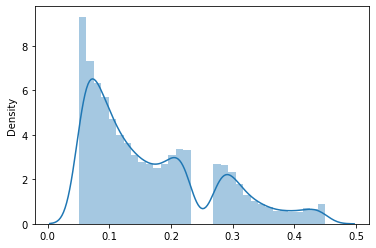

In [5]:
import seaborn as sns
sns.distplot(af_kp)

In [6]:
len(af_kp)

12112

<AxesSubplot:>

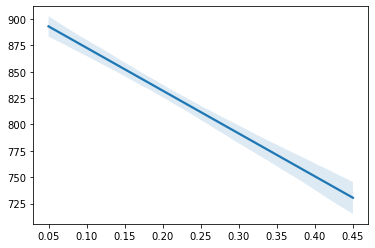

In [7]:
sns.regplot(x=af_kp,y=depth_kp, scatter=False)

In [8]:
v=vars_to_keep[0]
v.gt_depths

array([155, 133, 250], dtype=int32)

In [9]:
ad_kp[0]

38

In [10]:
depth_kp[0]

538

In [11]:
af_kp[0]

0.07063197026022305

In [12]:
vars_to_keep

[Variant(chr1:827583 A/T),
 Variant(chr1:1305755 C/T),
 Variant(chr1:1724489 G/C),
 Variant(chr1:2234759 C/T),
 Variant(chr1:2255646 T/G),
 Variant(chr1:2290637 G/A),
 Variant(chr1:2301087 G/T),
 Variant(chr1:2301093 G/A),
 Variant(chr1:2526578 A/G),
 Variant(chr1:2556224 C/A),
 Variant(chr1:3857251 C/G),
 Variant(chr1:3901407 C/T),
 Variant(chr1:5992521 G/A),
 Variant(chr1:6028197 G/T),
 Variant(chr1:6613610 G/T),
 Variant(chr1:6613720 C/G),
 Variant(chr1:6701842 C/T),
 Variant(chr1:6701850 G/T),
 Variant(chr1:6701853 A/G),
 Variant(chr1:6701855 T/C),
 Variant(chr1:6701860 C/T),
 Variant(chr1:6785000 G/C),
 Variant(chr1:6785028 C/G),
 Variant(chr1:6785052 C/T),
 Variant(chr1:6785093 C/T),
 Variant(chr1:6785126 G/A),
 Variant(chr1:6785160 G/A),
 Variant(chr1:6785162 G/C),
 Variant(chr1:6785164 C/T),
 Variant(chr1:6785166 G/A),
 Variant(chr1:6785177 A/G),
 Variant(chr1:6785182 T/C),
 Variant(chr1:6785196 G/T),
 Variant(chr1:6785221 C/T),
 Variant(chr1:6785225 A/G),
 Variant(chr1:6785232